In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
# read data into a dataframe
df = pd.read_csv("Student_Performance.csv")

In [32]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [33]:
# check for mising values
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

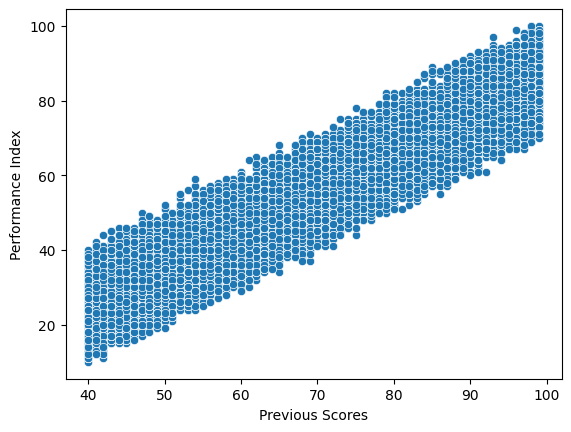

In [34]:
# visualize relationship between performance index and Previous scores
sns.scatterplot(df, x="Previous Scores", y="Performance Index")

## 1. Simple Linear Regression
### Using Previous Score and Performance Index

In [35]:
# split data
x_train, x_test, y_train, y_test = train_test_split(df[["Previous Scores"]], df["Performance Index"], 
                                                    test_size=0.2, random_state=42)

In [36]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [37]:
# access line intercept and gradient
gradient, intercept = LR.coef_, LR.intercept_

In [20]:
y_hat = LR.predict(x_test)

In [54]:
# calc regression metrics
mse = mean_squared_error(y_test, y_hat)
r2_value = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

In [40]:
pd.DataFrame({"Metric": ["Mean Square Error", "R2_Score", "Mean Absolute Error"],
              "Value":[mse, r2_value, mae]})

,Metric,Value
0,Mean Square Error,58.949060
1,R2_Score,0.840930
2,Mean Absolute Error,6.557486


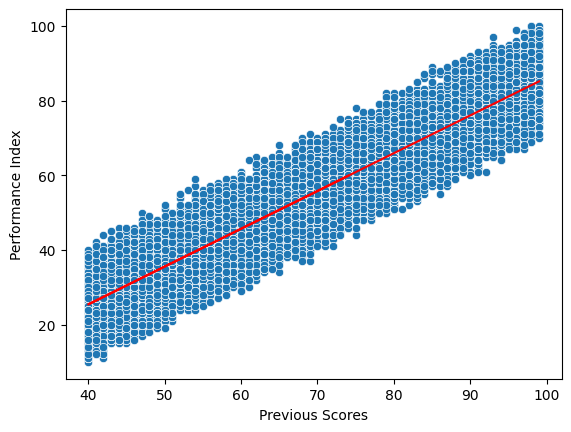

In [71]:
# visualize relationship between performance index and Previous scores
x = df["Previous Scores"]
sns.scatterplot(df, x="Previous Scores", y="Performance Index")
plt.plot(x, (gradient * x + intercept), c="red")
plt.show()

## Multiple Linear Regression

In [44]:
# dummy Extracurricular Activities
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes":1, "No":0})

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_15028\242765373.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes":1, "No":0})


In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [50]:
X = df.iloc[:, 0:5]
# split data
x_train, x_test, y_train, y_test = train_test_split(X, df["Performance Index"], 
                                                    test_size=0.2, random_state=42)

In [52]:
# create and train model
LR2 = LinearRegression()
LR2.fit(x_train, y_train)

LinearRegression()

In [66]:
y_hat = LR2.predict(x_test)

In [67]:
# calc regression metrics
mse = mean_squared_error(y_test, y_hat)
r2_value = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

In [68]:
pd.DataFrame({"Metric": ["Mean Square Error", "R2_Score", "Mean Absolute Error"],
              "Value":[mse, r2_value, mae]})

,Metric,Value
0,Mean Square Error,4.082628
1,R2_Score,0.988983
2,Mean Absolute Error,1.611121


### Mutiple linear Regression provides better results compared to Simple Linear Regression